In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task 1


In [8]:
my_columns = ['Feature1', 'Feature2', 'Target']
dt = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Labs/train-perceptron.txt", sep=" ", header = None, names = my_columns, dtype = float)
print(dt)

   Feature1  Feature2  Target
0       1.0       1.0     1.0
1       1.0      -1.0     1.0
2       2.0       2.5     2.0
3       0.0       2.0     2.0
4       2.0       3.0     2.0
5       4.0       5.0     1.0


In [9]:
w1 = dt[dt['Target'] % 2 == 0]
w2 = dt[dt['Target'] % 2 != 0]
print(w1)
print(w2)

   Feature1  Feature2  Target
2       2.0       2.5     2.0
3       0.0       2.0     2.0
4       2.0       3.0     2.0
   Feature1  Feature2  Target
0       1.0       1.0     1.0
1       1.0      -1.0     1.0
5       4.0       5.0     1.0


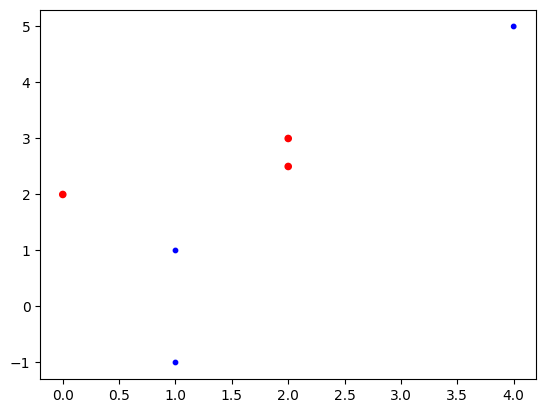

In [10]:
plt.scatter(w1['Feature1'], w1['Feature2'], s=w1['Target']*10, color='red')
plt.scatter(w2['Feature1'], w2['Feature2'], s=w2['Target']*10, color='blue')
plt.show()

Task 2

In [11]:
data = dt.to_numpy()
print(data)
print(len(data))

[[ 1.   1.   1. ]
 [ 1.  -1.   1. ]
 [ 2.   2.5  2. ]
 [ 0.   2.   2. ]
 [ 2.   3.   2. ]
 [ 4.   5.   1. ]]
6


In [12]:
def phiFunction(arr):
    x1square = arr[0] ** 2
    x2square = arr[1] ** 2
    x1timesx2 = arr[0] * arr[1]
    x1 = arr[0]
    x2 = arr[1]
    
    if arr[2] % 2 == 0:
        return np.array([[x1square, x2square, x1timesx2, x1, x2, 1]])
    else:
        return np.array([[x1square, x2square, x1timesx2, x1, x2, 1]]) * -1

In [13]:
y = np.empty((0, 6), dtype = float)
    
for i in range(len(data)):
    temp = phiFunction(data[i])
    y = np.append(y, temp, axis = 0)
print(y)

[[ -1.    -1.    -1.    -1.    -1.    -1.  ]
 [ -1.    -1.     1.    -1.     1.    -1.  ]
 [  4.     6.25   5.     2.     2.5    1.  ]
 [  0.     4.     0.     0.     2.     1.  ]
 [  4.     9.     6.     2.     3.     1.  ]
 [-16.   -25.   -20.    -4.    -5.    -1.  ]]


Task 3

In [14]:
def one_at_a_time(y, w, learningRate):
    classifiedData = 0
    itr = 0
    numberOfRows = y.shape[0]

    while classifiedData != numberOfRows:
        itr += 1
        classifiedData = 0
        
        for i in range(numberOfRows):
            g = np.dot(y[i], np.transpose(w))
            
            if g <= 0:
                w = w + learningRate * y[i]
            else:
                classifiedData += 1

    return itr 


In [15]:
def many_at_a_time(y, w, learningRate):
    itr = 0
    classifiedData = 0
    numberOfRows = y.shape[0]

    while classifiedData != numberOfRows:
        itr = itr + 1
        classifiedData = 0
        missclissifiedSum = np.zeros((1, y.shape[1]))

        for i in range(numberOfRows):
            update = np.dot(y[i], np.transpose(w))
            
            if update <= 0:
                missclissifiedSum = missclissifiedSum + y[i]
            else:
                classifiedData += 1
        w = w + learningRate * missclissifiedSum
    
    return itr

Task 4

In [16]:
np.random.seed(5)

weightOne = np.ones((1, y.shape[1]))
weightZero = np.zeros((1, y.shape[1]))
weightRandom = np.random.random((1, y.shape[1]))

learningRate = np.arange(0.1, 1.1, 0.1)

oneTime_weightOne, oneTime_weightZero, oneTime_weightRandom, manyTime_weightOne, manyTime_weightZero, manyTime_weightRandom = [], [], [], [], [], []

for i in learningRate:
    oneTime_weightOne.append( one_at_a_time(y, weightOne, i) )
    oneTime_weightZero.append( one_at_a_time(y, weightZero, i) )
    oneTime_weightRandom.append( one_at_a_time(y, weightRandom, i) )
    manyTime_weightOne.append( many_at_a_time(y, weightOne, i) )
    manyTime_weightZero.append( many_at_a_time(y, weightZero, i) )
    manyTime_weightRandom.append( many_at_a_time(y, weightRandom, i) )
    
print('When one at a time is called having all wights one:', oneTime_weightOne)
print('When one at a time is called having all wights zero:', oneTime_weightZero)
print('When one at a time is called having all wights are random:', oneTime_weightRandom)
print('When many at a time is called having all wights one:', manyTime_weightOne)
print('When many at a time is called having all wights zero:', manyTime_weightZero)
print('When many at a time is called having all wights are random:', manyTime_weightRandom)

When one at a time is called having all wights one: [143, 158, 153, 137, 143, 140, 145, 149, 153, 142]
When one at a time is called having all wights zero: [141, 141, 141, 141, 141, 141, 141, 141, 141, 141]
When one at a time is called having all wights are random: [132, 150, 151, 150, 144, 141, 137, 136, 136, 136]
When many at a time is called having all wights one: [103, 95, 122, 95, 108, 107, 102, 106, 90, 107]
When many at a time is called having all wights zero: [105, 105, 92, 105, 92, 105, 105, 105, 105, 92]
When many at a time is called having all wights are random: [83, 111, 116, 89, 91, 105, 100, 116, 117, 116]


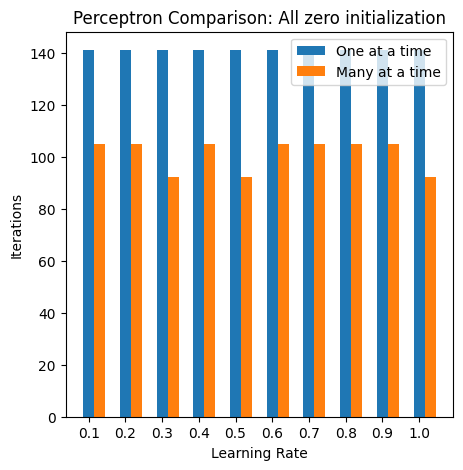

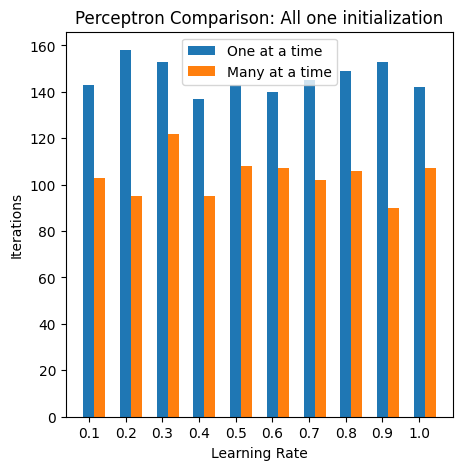

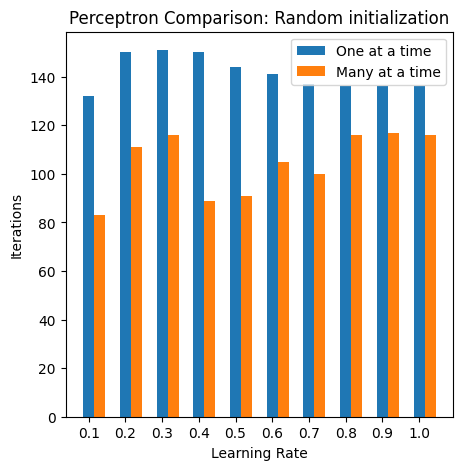

In [17]:
def plot_bar_chart(x, y1, y2, init_type):
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.bar(x, y1, width=0.03, align='center', label='One at a time')
    ax.bar(x+0.03, y2, width=0.03, align='center', label='Many at a time')

    plt.xlabel('Learning Rate')
    plt.ylabel('Iterations')
    plt.title('Perceptron Comparison: '+init_type)
    plt.xticks(x)
    plt.legend()
    plt.show()
    
plot_bar_chart(learningRate, oneTime_weightZero, manyTime_weightZero, 'All zero initialization')
plot_bar_chart(learningRate, oneTime_weightOne, manyTime_weightOne, 'All one initialization')
plot_bar_chart(learningRate, oneTime_weightRandom, manyTime_weightRandom, 'Random initialization')

---
***Question***: In task 2, why do we need to take the sample points to a high dimension?
<br>
***Answer***: As we can see from graph 1 on task 1, two classes W1 and W2 are not linearly separable in their given dimensions. So to avoid missclassification problems I take the sample points to a higher dimension.